In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
from collections import defaultdict

In [31]:
files = glob.glob('../Output/ICA/*.csv')
files.sort()

In [32]:
files = dict(enumerate(files))
files
#len(files)

{0: '../Output/ICA/BreastC Silhouette.csv',
 1: '../Output/ICA/BreastC acc.csv',
 2: '../Output/ICA/BreastC adjMI.csv',
 3: '../Output/ICA/BreastC2D.csv',
 4: '../Output/ICA/Faults Silhouette.csv',
 5: '../Output/ICA/Faults acc.csv',
 6: '../Output/ICA/Faults adjMI.csv',
 7: '../Output/ICA/Faults2D.csv',
 8: '../Output/ICA/SSE.csv',
 9: '../Output/ICA/logliklihood.csv'}

In [33]:
dfs = defaultdict(int)
for indx, f in files.items():
    dfs[indx] = pd.read_csv(f)

## Part 1: Clustering Analyses

K-means SSE - Both datasets:  **dfs[8]**

GMM Loglikelihood - Both datasets:  **dfs[9]**

Silhouette - BreastC:  **dfs[0]** 

acc - BreastC:  **dfs[1]**

adjMI - BreastC:  **dfs[2]**

Visualize dataset in 2D - Breast C:  **dfs[3]**

Silhouette - Faults:  **dfs[4]** 

acc - Faults:  **dfs[5]**

adjMI - Faults:  **dfs[6]**

Visualize dataset in 2D - Faults:  **dfs[7]**

In [34]:
km_SSE = dfs[8]
gmm_log = dfs[9]
bc_ss = dfs[0].T[1:]
bc_acc = dfs[1].T[1:]
bc_adjMI = dfs[2].T[1:]
bc_2d = dfs[3]

f_ss = dfs[4].T[1:]
f_acc = dfs[5].T[1:]
f_adjMI = dfs[6].T[1:]
f_2d = dfs[7]

# Choosing K
## K-Means SSE: (Breast Cancer & Faulty Plates)

In [35]:
km_SSE.columns = ['clusters','bc_sse','fp_sse']
x = km_SSE['clusters']
bc_y = km_SSE['bc_sse']
f_y = km_SSE['fp_sse']
km_SSE.head()

,clusters,bc_sse,fp_sse
0,2,11012.521565,5013.310166
1,3,10713.310024,3966.087030
2,4,10421.524294,2941.356469
3,5,10160.820292,2256.443662
4,6,9966.232360,1974.726206


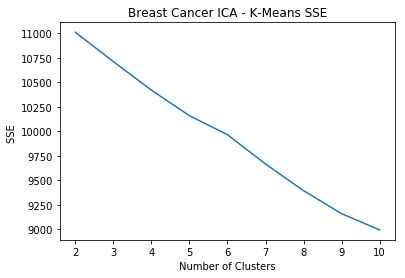

In [36]:
plt.plot(x,bc_y)
plt.ylabel("SSE ")
plt.xlabel("Number of Clusters")
plt.title('Breast Cancer ICA - K-Means SSE')
plt.show()

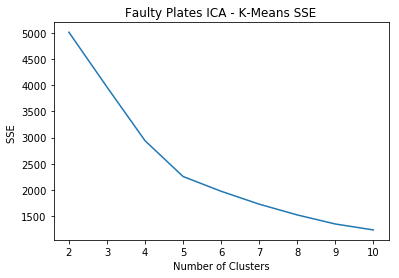

In [37]:
plt.plot(x,f_y)
plt.ylabel("SSE ")
plt.xlabel("Number of Clusters")
plt.title('Faulty Plates ICA - K-Means SSE')
plt.show()

## EM Log-Likelihood: (Breast Cancer & Faulty Plates)

In [38]:
gmm_log.columns = ['clusters','bc_log','fp_log']
x = gmm_log['clusters']
bc_y = gmm_log['bc_log']
f_y = gmm_log['fp_log']
gmm_log.head()

,clusters,bc_log,fp_log
0,2,-30.414719,-4.394292
1,3,-29.099924,-4.251972
2,4,-26.073343,-3.778278
3,5,-24.947187,-3.680739
4,6,-21.833337,-3.492416


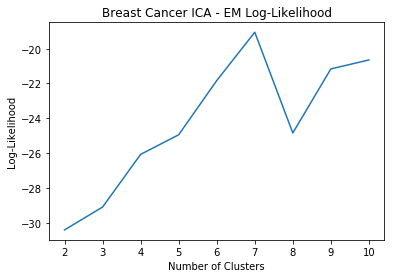

In [39]:
plt.plot(x,bc_y)
plt.ylabel("Log-Likelihood")
plt.xlabel("Number of Clusters")
plt.title('Breast Cancer ICA - EM Log-Likelihood')
plt.show()

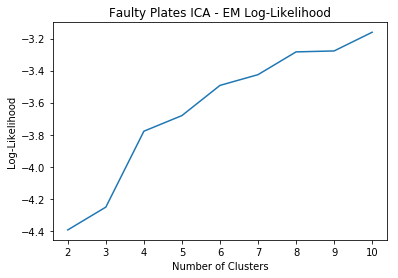

In [40]:
plt.plot(x,f_y)
plt.ylabel("Log-Likelihood")
plt.xlabel("Number of Clusters")
plt.title('Faulty Plates ICA - EM Log-Likelihood')
plt.show()

# Breast Cancer Dataset

## Silhouette Score: K-Means and EM

In [41]:
bc_ss['clusters'] = bc_ss.index
bc_ss.columns = ['gmm_ss','km_ss','clusters']
x = bc_ss['clusters']
gmm_y = bc_ss['gmm_ss']
km_y = bc_ss['km_ss']
bc_ss.head()

,gmm_ss,km_ss,clusters
2,0.146288,0.115869,2
3,0.11497,0.134625,3
4,0.0409549,0.0611763,4
5,0.00295688,0.0227827,5
6,0.0582831,0.0176683,6


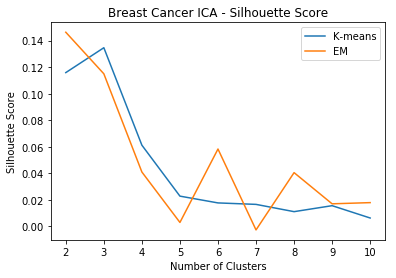

In [42]:
plt.plot(x,km_y, label="K-means")
plt.plot(x,gmm_y, label="EM")
plt.ylabel("Silhouette Score")
plt.xlabel("Number of Clusters")
plt.title('Breast Cancer ICA - Silhouette Score')
plt.legend()
plt.show()

## Cluster Evaluation 
## Accuracy Score: K-Means and EM

In [43]:
bc_acc['clusters'] = bc_acc.index
bc_acc.columns = ['gmm_acc','km_acc','clusters']
x = bc_acc['clusters']
gmm_y = bc_acc['gmm_acc']
km_y = bc_acc['km_acc']
bc_acc.head()

,gmm_acc,km_acc,clusters
2,0.61978,0.87033,2
3,0.624176,0.641758,3
4,0.89011,0.751648,4
5,0.846154,0.707692,5
6,0.90989,0.694505,6


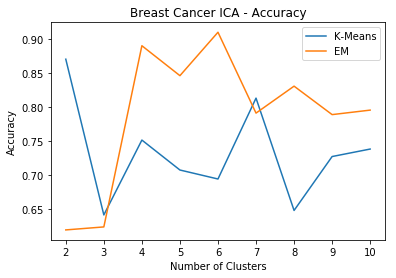

In [44]:
plt.plot(x,km_y, label = "K-Means")
plt.plot(x,gmm_y, label = "EM")
plt.ylabel("Accuracy")
plt.xlabel("Number of Clusters")
plt.title('Breast Cancer ICA - Accuracy')
plt.legend()
plt.show()

## Adjusted MI: K-Means and EM

In [45]:
bc_adjMI['clusters'] = bc_adjMI.index
bc_adjMI.columns = ['gmm_adjMI','km_adjMI','clusters']
x = bc_adjMI['clusters']
gmm_y = bc_adjMI['gmm_adjMI']
km_y = bc_adjMI['km_adjMI']

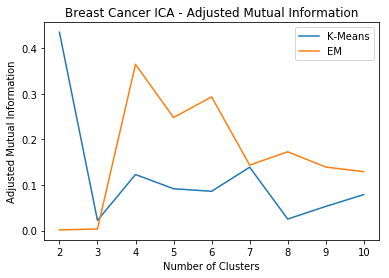

In [46]:
plt.plot(x,km_y, label="K-Means")
plt.plot(x,gmm_y, label="EM")
plt.ylabel("Adjusted Mutual Information")
plt.xlabel("Number of Clusters")
plt.title('Breast Cancer ICA - Adjusted Mutual Information')
plt.legend()
plt.show()

# Faulty Plates Dataset

## Silhouette Score: K-Means and EM

In [47]:
f_ss['clusters'] = bc_ss.index
f_ss.columns = ['gmm_ss','km_ss','clusters']
x = f_ss['clusters']
gmm_y = f_ss['gmm_ss']
km_y = f_ss['km_ss']
f_ss.head()

,gmm_ss,km_ss,clusters
2,0.329434,0.327638,2
3,0.273965,0.25184,3
4,0.255725,0.296652,4
5,0.239535,0.32212,5
6,0.249749,0.336881,6


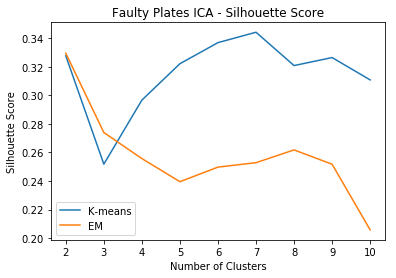

In [48]:
plt.plot(x,km_y, label="K-means")
plt.plot(x,gmm_y, label="EM")
plt.ylabel("Silhouette Score")
plt.xlabel("Number of Clusters")
plt.title('Faulty Plates ICA - Silhouette Score')
plt.legend()
plt.show()

## Cluster Evaluation 
## Accuracy Score: K-Means and EM

In [49]:
f_acc['clusters'] = f_acc.index
f_acc.columns = ['gmm_acc','km_acc','clusters']
x = f_acc['clusters']
gmm_y = f_acc['gmm_acc']
km_y = f_acc['km_acc']
f_acc.head()

,gmm_acc,km_acc,clusters
2,0.494845,0.490335,2
3,0.496778,0.400773,3
4,0.489046,0.494845,4
5,0.505799,0.534149,5
6,0.499356,0.528351,6


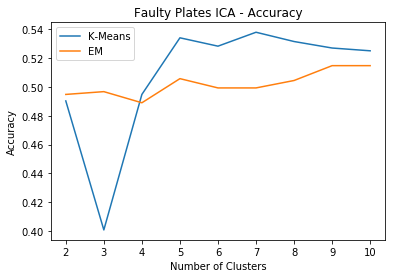

In [50]:
plt.plot(x,km_y, label = "K-Means")
plt.plot(x,gmm_y, label = "EM")
plt.ylabel("Accuracy")
plt.xlabel("Number of Clusters")
plt.title('Faulty Plates ICA - Accuracy')
plt.legend()
plt.show()

## Adjusted MI: K-Means and EM

In [51]:
f_adjMI['clusters'] = f_adjMI.index
f_adjMI.columns = ['gmm_adjMI','km_adjMI','clusters']
x = f_adjMI['clusters']
gmm_y = f_adjMI['gmm_adjMI']
km_y = f_adjMI['km_adjMI']

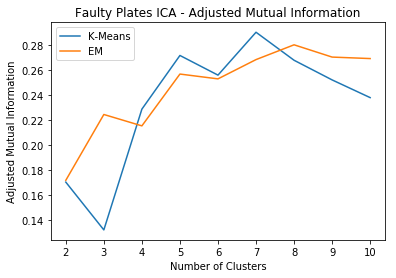

In [52]:
plt.plot(x,km_y, label="K-Means")
plt.plot(x,gmm_y, label="EM")
plt.ylabel("Adjusted Mutual Information")
plt.xlabel("Number of Clusters")
plt.title('Faulty Plates ICA - Adjusted Mutual Information')
plt.legend()
plt.show()

## 2D Visualizaion

In [53]:
f_2d.columns = ['data','x','y','target']
f_2d.head()

,data,x,y,target
0,0,-2.156394,-7.943189,Dirtiness
1,1,-3.544592,-5.092802,Bumps
2,2,-17.750407,-0.071942,Dirtiness
3,3,14.262605,5.497097,Other_Faults
4,4,15.601364,0.509703,Stains


## ICA Analyses

In [54]:
files1 = glob.glob('../Output/ICA/ICA/*scree.csv')
files1.sort()

In [55]:
files1 = dict(enumerate(files1))
files1

{0: '../Output/ICA/ICA/bc scree.csv', 1: '../Output/ICA/ICA/faults scree.csv'}

In [56]:
dfs1 = defaultdict(int)
for indx, f in files1.items():
    dfs1[indx] = pd.read_csv(f,names = ["Components","Kurtosis"])

In [57]:
# bc_cluster = dfs1[0]
bc_scree = dfs1[0]
# f_cluster = dfs1[2]
f_scree = dfs1[1]

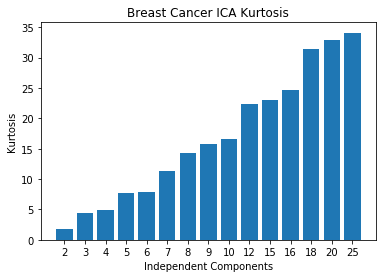

In [58]:
height = bc_scree["Kurtosis"]
bars = bc_scree["Components"]
y_pos = np.arange(len(bars))
plt.ylabel("Kurtosis")
plt.xlabel("Independent Components")
plt.title('Breast Cancer ICA Kurtosis')
plt.bar(y_pos,height)
plt.xticks(y_pos, bars)
plt.show()

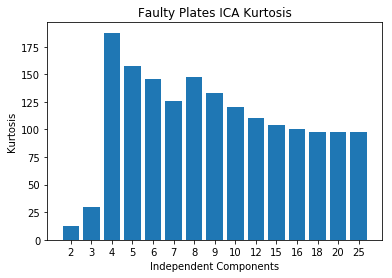

In [59]:
height = f_scree["Kurtosis"]
bars = f_scree["Components"]
y_pos = np.arange(len(bars))
plt.ylabel("Kurtosis")
plt.xlabel("Independent Components")
plt.title('Faulty Plates ICA Kurtosis')
plt.bar(y_pos,height)
plt.xticks(y_pos, bars)
plt.show()